In [10]:
import glob
import cv2
import numpy as np
import duplicate_utils as du
import imutils

## read all the png images
img_path = r"C:\TUC_study\kopernikus\dataset\*.*"

im_ls = []
for file in glob.glob(img_path):
    img = cv2.imread(file)
    im_ls.append(img)
    # break


# im_ls = im_ls[:20]
# cv2.imshow("Zeros matx", im_ls[0]) # show numpy array
# cv2.waitKey(0)
# cv2.destroyAllWindows()

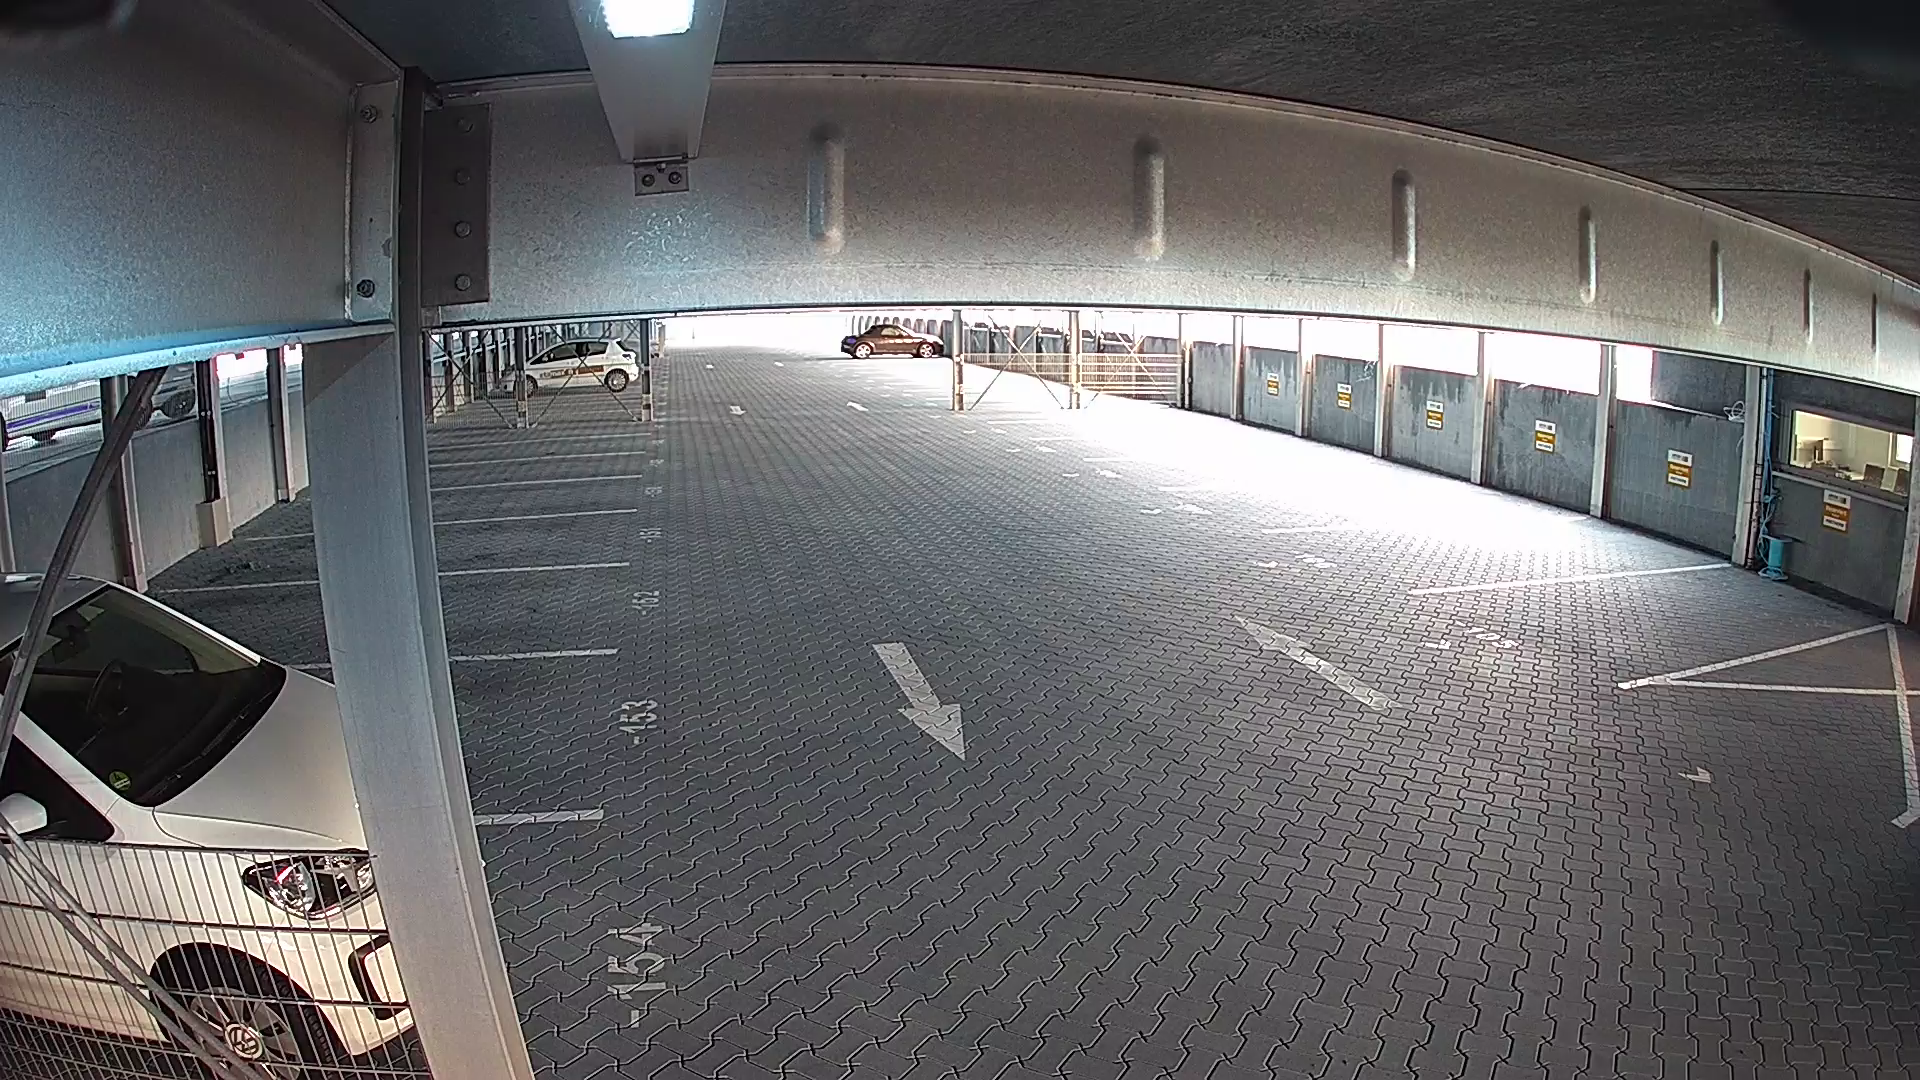

(None, (1080, 1920, 3))

In [136]:
from PIL import Image

idx = np.random.randint(0, len(im_ls)-1)
im_arr = im_ls[idx]
img = Image.fromarray(im_arr)
display(img), im_arr.shape

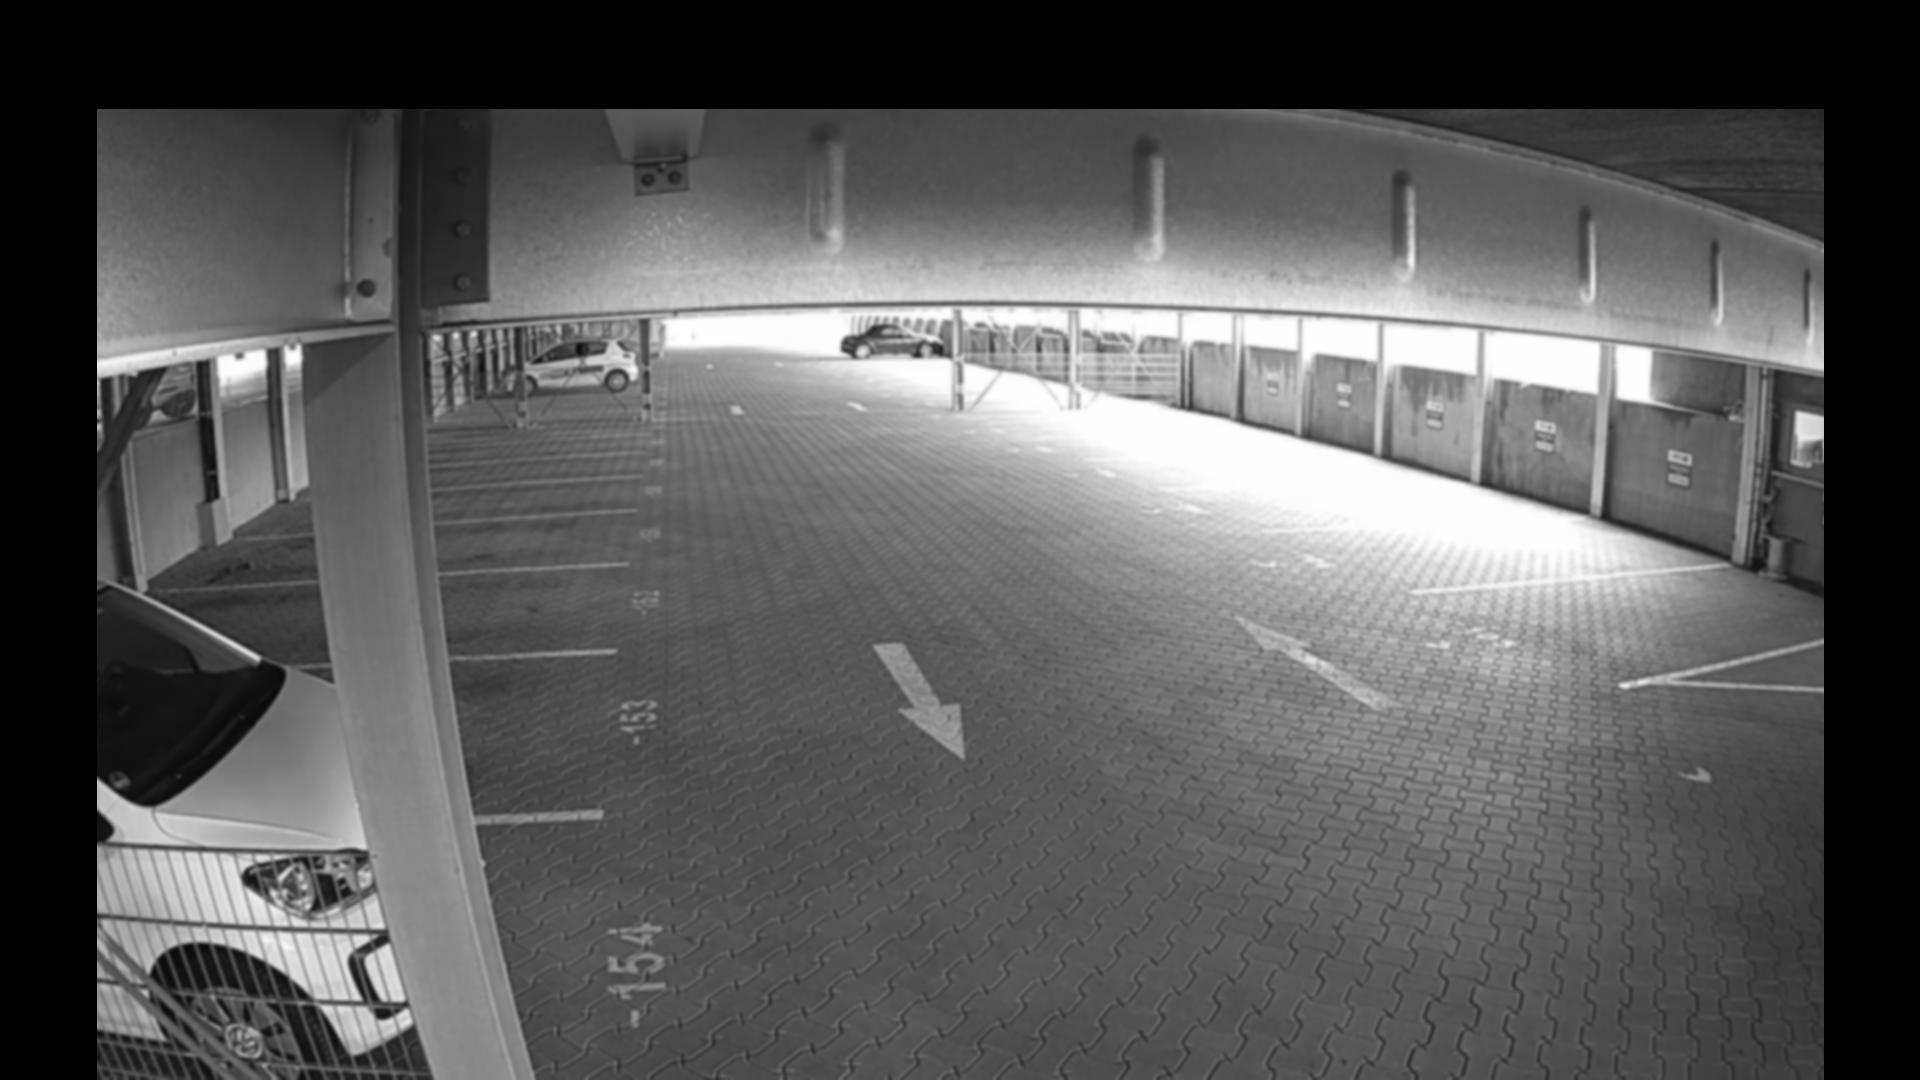

(None, (1080, 1920))

In [137]:
gray1 = du.preprocess_image_change_detection(im_arr, [3,5,7])
display(Image.fromarray( gray1)), gray1.shape


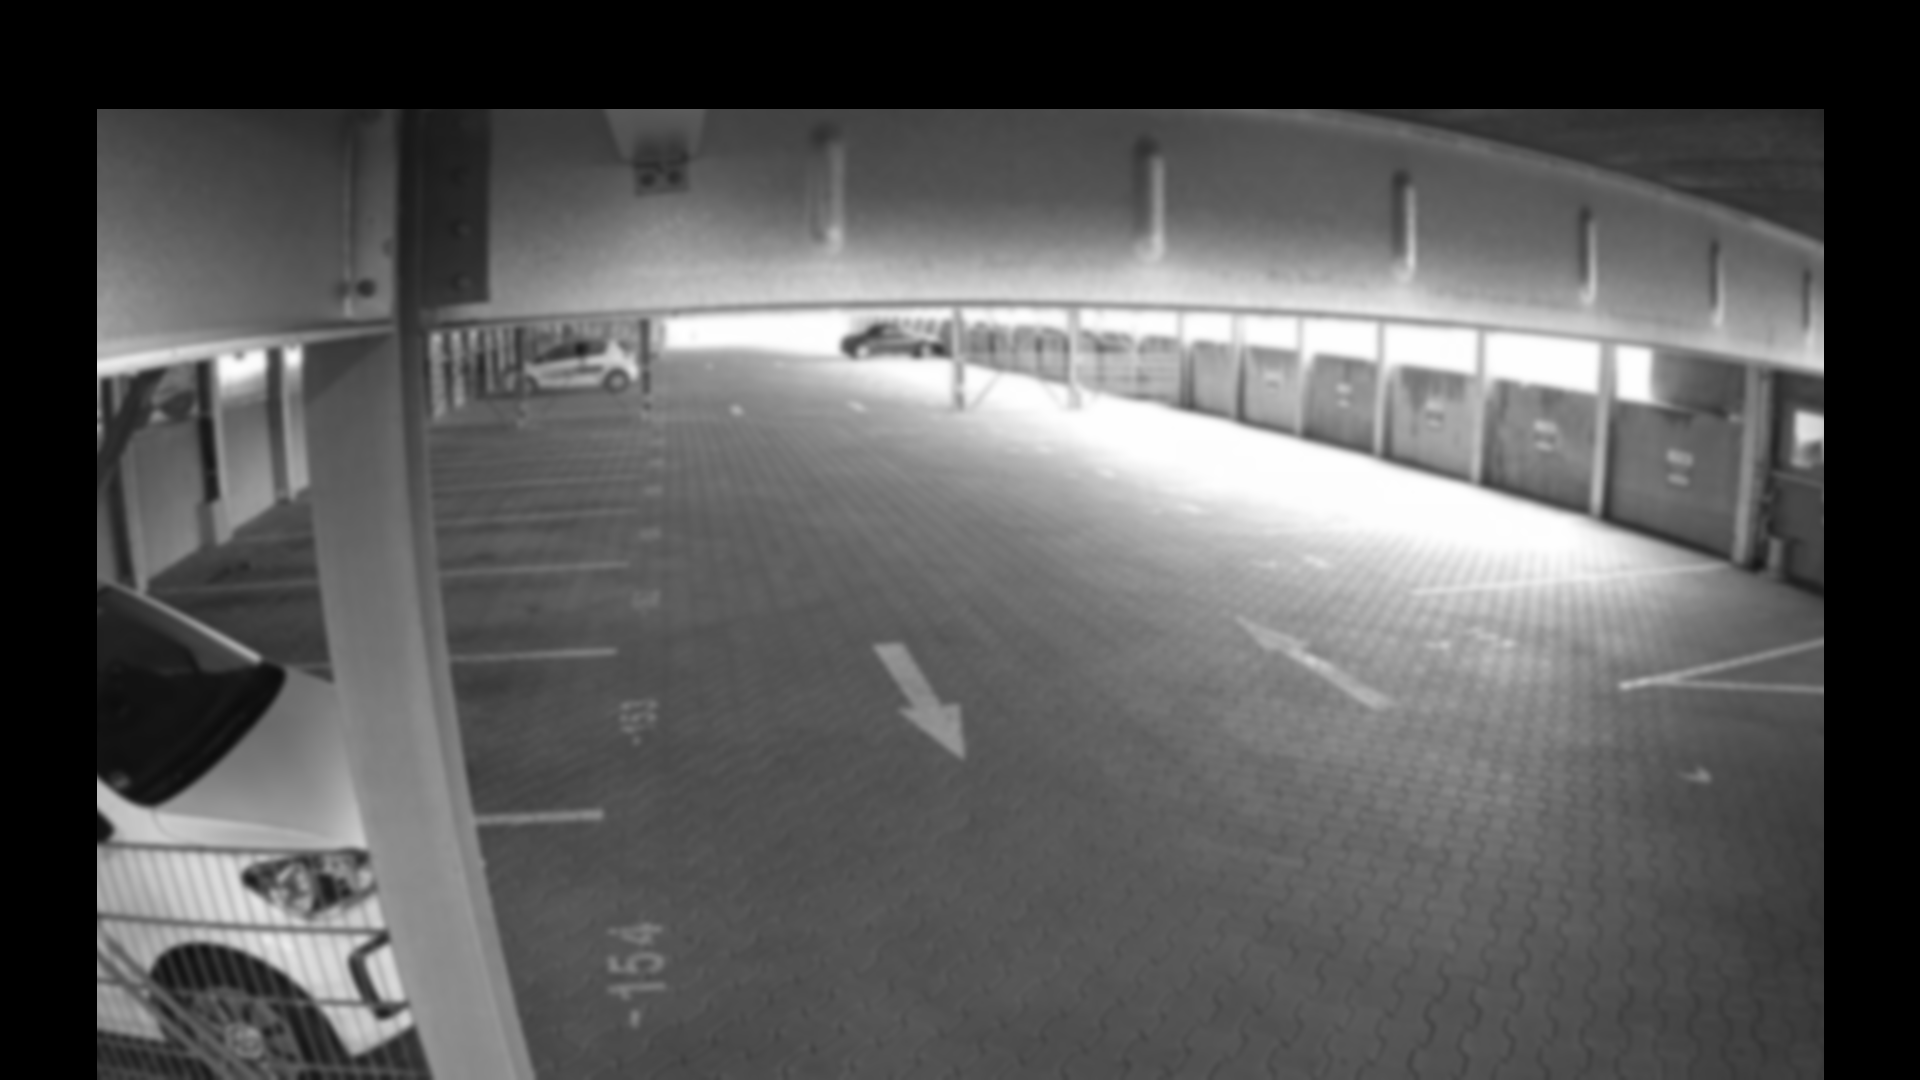

(None, (1080, 1920))

In [138]:
gray2 = du.preprocess_image_change_detection(im_arr, [7,11,13])
display(Image.fromarray(gray2)), gray2.shape


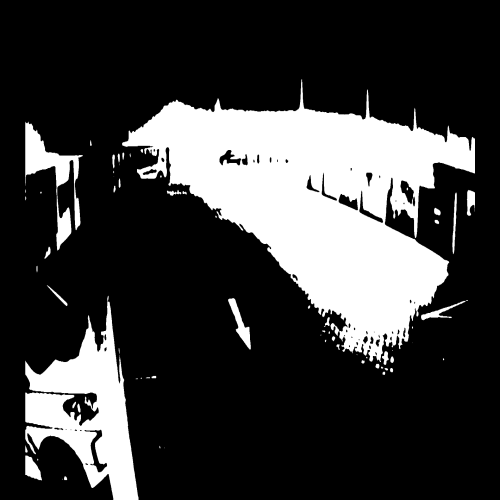

(None, (500, 500))

In [139]:
gray= du.preprocess_image_change_detection(im_arr, [7,9,11])
# ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# ret, thresh = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)
ret, thresh = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)
thresh = cv2.resize(thresh, (500,500), interpolation = cv2.INTER_AREA)
display(Image.fromarray(thresh)), thresh.shape

In [ ]:
# imgray = cv2.cvtColor(im_arr, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
# contours= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#                             cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(contours)

In [ ]:
# ret, thresh = cv2.threshold(imgray, 127, 255,cv2.THRESH_BINARY)
# Image.fromarray(thresh)

In [ ]:
# cnt_lens = [len(c) for c in cnts]
# max_cnt_id = cnt_lens.index(max(cnt_lens))

In [ ]:
# cont_im = cv2.drawContours(thresh, [cnts[max_cnt_id]], 0, (0,255,0), 5)
# Image.fromarray(cont_im)

In [ ]:
# score = 0
# res_cnts = []
# max_area = 0
# for c in cnts:
    
#     if cv2.contourArea(c) < 100:
#         continue
    
#     if cv2.contourArea(c) > max_area:
#         max_area = cv2.contourArea(c)
#     res_cnts.append(c)
#     score += cv2.contourArea(c)

# max_area, score

In [ ]:
import warnings
import os
import cv2
import duplicate_utils as du
# from PIL import Image

## read all the png images
# img_path = r"C:\TUC_study\kopernikus\dataset\*.*"
img_path = r"C:\TUC_study\kopernikus\imgs"


new_im_size = (500, 500)
corrupt_files = []
file_name_ls = []
im_arr_ls = []

if len(os.listdir(img_path)) != 0: 
    for file in os.listdir(img_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            try:
                im_arr = cv2.imread(os.path.join(img_path,file))
                im_resized = cv2.resize(im_arr, 
                                        new_im_size, 
                                        interpolation = cv2.INTER_AREA)
                im_arr_ls.append(im_resized)
                file_name_ls.append(file)
            except cv2.error as e:
                print(f"Error opening file: {file}")
                corrupt_files.append(file)
    if len(file_name_ls) == 0:
        warnings.warn("No '.png' or '.jpg' files found in the folder", UserWarning)
else:
    warnings.warn("The image folder is EMPTY!", UserWarning)

if len(file_name_ls) >= 2:
    unique_ls = [file_name_ls[0]]
    for i, _ in enumerate(im_arr_ls[:-1]):
        gray1 = du.preprocess_image_change_detection(im_arr_ls[i], [3,5,7])
        gray2 = du.preprocess_image_change_detection(im_arr_ls[i+1], [3,5,7])    
        score, res_cnts, thresh = du.compare_frames_change_detection(gray1, gray2, 10000)
        if score != 0:
            unique_ls.append(file_name_ls[i+1])

len(unique_ls)

In [ ]:
import cv2
import concurrent.futures

def read_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_COLOR)

def read_images_parallel(image_paths):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        image_files = executor.map(read_image, image_paths)
    return list(image_files)

# Example usage
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg"]
images = read_images_parallel(image_paths)


In [ ]:
my_set = {1, 2, 3, 4, 5}
my_set.discard(3)

# Trying to discard an element not present in the set
my_set.discard(6)
my_set.discard(1)

In [ ]:
print(len(im_arr_ls))
gray1 = du.preprocess_image_change_detection(im_arr_ls[502], [3,5,7])
gray2 = du.preprocess_image_change_detection(im_arr_ls[500], [3,5,7])
display(Image.fromarray(gray1)), display(Image.fromarray(gray2))

In [ ]:
# def compare_frames_change_detection(prev_frame, next_frame, min_contour_area):
#     frame_delta = cv2.absdiff(prev_frame, next_frame)
#     thresh = cv2.threshold(frame_delta, 45, 255, cv2.THRESH_BINARY)[1]

#     thresh = cv2.dilate(thresh, None, iterations=2)
#     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#                             cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)

#     score = 0
#     res_cnts = []
#     for c in cnts:
#         if cv2.contourArea(c) < min_contour_area:
#             continue

#         res_cnts.append(c)
#         score += cv2.contourArea(c)

#     return score, res_cnts, thresh, frame_delta

In [ ]:
# score, res_cnts, thresh, frame_delta = compare_frames_change_detection(gray1, gray2, 5000)
# score, len(res_cnts)

# cv2.drawContours(thresh, res_cnts, -1, (128,0,255),5)
  
# cv2.imshow('Contours', thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
unique_ls = [file_name_ls[0]]
for i, _ in enumerate(im_arr_ls[:-1]):
    gray1 = du.preprocess_image_change_detection(im_arr_ls[i], [3,5,7])
    gray2 = du.preprocess_image_change_detection(im_arr_ls[i+1], [3,5,7])    
    score, res_cnts, thresh = du.compare_frames_change_detection(gray1, gray2, 2000)
    if score != 0:
        unique_ls.append(file_name_ls[i+1])

len(unique_ls)

### Using Hashmaps

In [ ]:
import os
from PIL import Image
import imagehash

def find_similar_images(folder_path, threshold=5):
    image_hashes = {}
    similar_images = set()

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)

            # Open the image file using PIL
            try:
                with Image.open(file_path) as img:
                    # Compute the image hash using the average hashing algorithm
                    img_hash = imagehash.average_hash(img)
                    if img_hash in image_hashes:
                        # If a similar image hash is found, add it to the similar_images set
                        similar_images.add(image_hashes[img_hash])
                        similar_images.add(filename)
                    else:
                        # Store the image hash in the dictionary
                        image_hashes[img_hash] = filename
            except OSError:
                print(f"Error opening file: {file_path}")

    # Remove similar images from the unique set
    unique_images = set(os.listdir(folder_path)) - similar_images
    return unique_images,similar_images

# Example usage
folder_path = r"C:\TUC_study\kopernikus\dataset"

unique_images, similar_images = find_similar_images(folder_path)
print("Unique images:")
for image in unique_images:
    print(image)

len(similar_images), len(unique_images)

## my method

In [3]:
import warnings
import os
import cv2
import duplicate_utils as du
 
## read all the png images
img_path = r"C:\TUC_study\kopernikus\dataset"
# img_path = r"C:\TUC_study\kopernikus\imgs"
all_filenames = os.listdir(img_path)

def similarity_score(image_1, image_2, tolerance):
    gray1 = du.preprocess_image_change_detection(image_1, [3,5,7])
    gray2 = du.preprocess_image_change_detection(image_2, [3,5,7])    
    sim_score, _, _ = du.compare_frames_change_detection(gray1, gray2, tolerance)
    
    return sim_score

new_im_size = (1000, 1000)
corrupt_files = []
file_name_ls = []
im_arr_ls = []

if len(os.listdir(img_path)) == 0:
    warnings.warn("The image folder is EMPTY!", UserWarning)
    # return

for file in os.listdir(img_path):
    if file.endswith(".jpg") or file.endswith(".png"):
        try:
            im_arr = cv2.imread(os.path.join(img_path,file))

            # an image should be readable and at least 64x64
            if im_arr is None:
                print(f"Error opening file: {file}")
                continue
            if im_arr.size < 4096:
                continue

            im_resized = cv2.resize(im_arr, 
                                    new_im_size, 
                                    interpolation = cv2.INTER_AREA)
            im_arr_ls.append(im_resized)
            file_name_ls.append(file)
        except cv2.error as e:
            print(f"Error opening file: {file}")
            corrupt_files.append(file)
if len(file_name_ls) == 0:
    warnings.warn("No '.png' or '.jpg' files found in the folder", UserWarning)
    #return


contour_threshold = 2500
unique_im_arr_ls = []
similarity_dict = {'min_are_threshold': contour_threshold,
                   'unique_image_files': [],
                   'duplicate_image_files': [],
                   }

for idx, filename in enumerate(file_name_ls):
    is_similar = False

    ## check with previous image
    if idx >= 1: 
        sim_score = similarity_score(im_arr_ls[idx], 
                                     im_arr_ls[idx-1], 
                                     contour_threshold)
        if sim_score == 0:
            is_similar = True
            similarity_dict['duplicate_image_files'].append(filename)
            continue   
    
    ## check with all unique images
    for uniq_im in unique_im_arr_ls:
        sim_score = similarity_score(im_arr_ls[idx], 
                                     uniq_im, 
                                     contour_threshold)
        if sim_score == 0:
            is_similar = True
            similarity_dict['duplicate_image_files'].append(filename)
            break

    if not is_similar:
        unique_im_arr_ls.append(im_arr_ls[idx])
        similarity_dict['unique_image_files'].append(filename)

Error opening file: c21_2021_03_27__10_36_36.png


In [4]:
print(len(similarity_dict['duplicate_image_files']))
print(len(similarity_dict['unique_image_files']))

874
204


In [6]:
path1 = img_path + '/unique'
for i, im_file in enumerate(similarity_dict['unique_image_files']):
    im = cv2.imread(os.path.join(img_path, im_file))
    cv2.imwrite(os.path.join(path1, im_file), im)